<a href="https://colab.research.google.com/github/JoseJ09/Tweets_sentiment_analysis/blob/main/Tweets_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TWEETS SENTIMENT ANALYSIS**

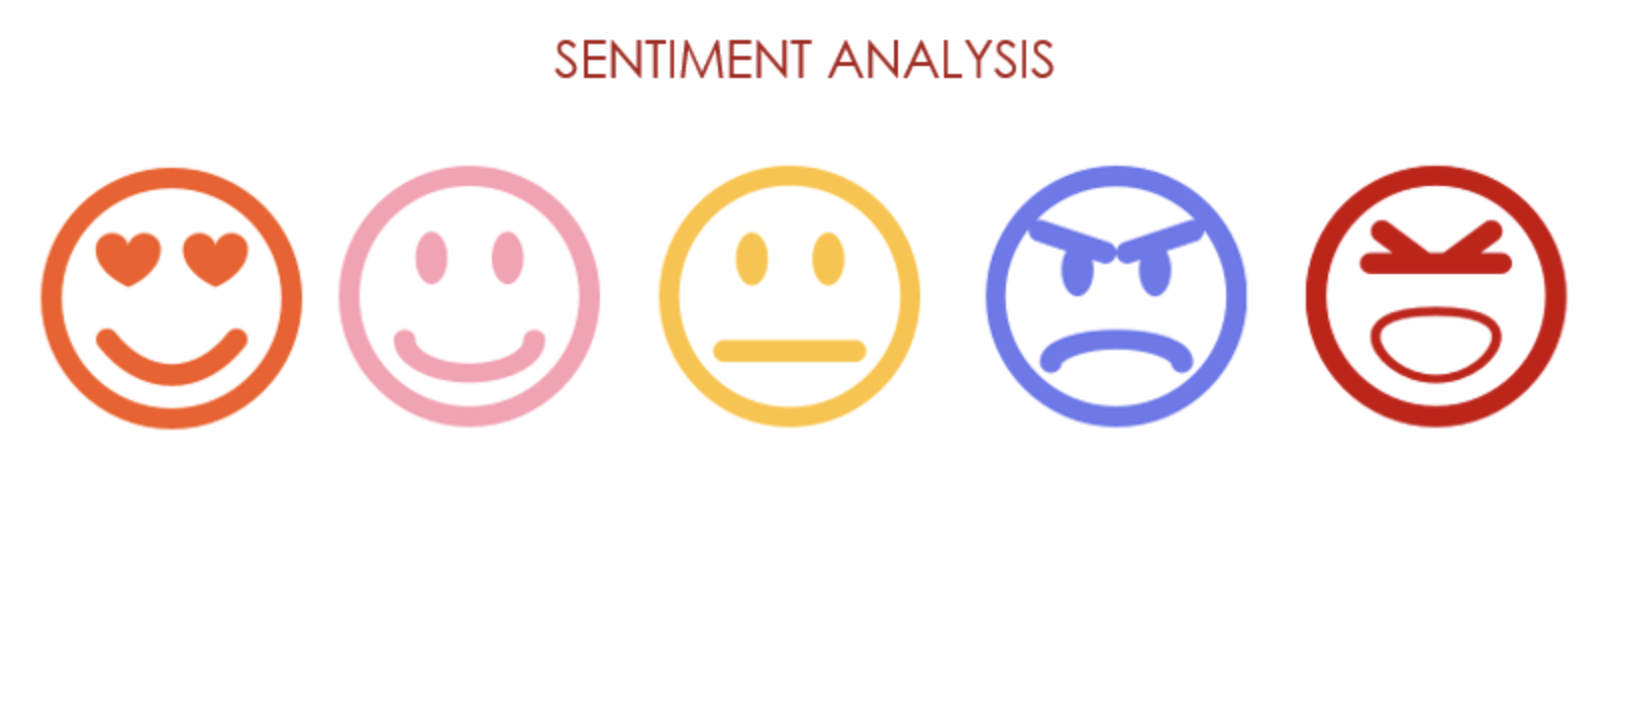

In [149]:
# importing necessary libraries

import nltk, re, string
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [150]:
# Here we will process the tweets and tokenize them

def process_tweet(tweet):
    stemmer = nltk.PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = nltk.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and
                word not in string.punctuation):
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


In [ ]:

# Here we will build our feature set through which we will be training our model.

In [151]:
def build_fr(tweets, tst):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if tst is already a list.
    tslist = np.squeeze(tst).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(tslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [152]:
# Checking how the above code works with an example.

tweets = ['I am happy', 'I am angry', 'I am sad', 'I am tired', 'i am tired']
tst = [1, 0, 0, 0, 0]
res = build_fr(tweets,tst)
print(res)

{('happi', 1): 1, ('angri', 0): 1, ('sad', 0): 1, ('tire', 0): 2}


In [153]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [154]:
# split the data into two pieces, one for training and one for testing.
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

In [155]:
train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [156]:
# combine positive and negative labels
# We are building our y - target variable here
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
print(train_y.shape)
print(test_y.shape)

(8000, 1)
(2000, 1)


In [157]:
print(train_y)
print(test_y)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [158]:
# create frequency dictionary
freqs = build_fr(train_x, train_y)

In [159]:
print(freqs)

{('followfriday', 1.0): 23, ('top', 1.0): 30, ('engag', 1.0): 7, ('member', 1.0): 14, ('commun', 1.0): 27, ('week', 1.0): 72, (':)', 1.0): 2847, ('hey', 1.0): 60, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 80, ('call', 1.0): 27, ('contact', 1.0): 4, ('centr', 1.0): 1, ('02392441234', 1.0): 1, ('abl', 1.0): 6, ('assist', 1.0): 1, ('mani', 1.0): 28, ('thank', 1.0): 504, ('listen', 1.0): 14, ('last', 1.0): 39, ('night', 1.0): 55, ('bleed', 1.0): 2, ('amaz', 1.0): 41, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 15, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 57, ('blue', 1.0): 8, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 4, ('profil', 1.0): 2, ('15', 1.0): 4, ('day', 1.0): 187, ('one', 1.0): 90, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 16, ('like', 1.0): 187, ('keep', 1.0): 55, ('love', 1.0): 336, ('custom', 1.0): 4, ('wait', 1.0): 55, ('long', 

In [160]:
# check out the output

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11338


In [162]:
# test the function below

print('This is an example of a positive tweet: \n', train_x[23])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[23]))

This is an example of a positive tweet: 
 Hello :) Get Youth Job Opportunities follow &gt;&gt; @tolajobjobs @maphisa301

This is an example of the processed version of the tweet: 
 ['hello', ':)', 'get', 'youth', 'job', 'opportun', 'follow']


For better understanding of Logistic Regression: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

In [163]:
# Unlike most, we will actully build a Logistic Regression Model from scratch
#  Logistic regression

# Sigmoid Function
def sigmoid(z):
    """
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    """
    zz = np.negative(z)
    h = 1 / (1 + np.exp(zz))
    return h

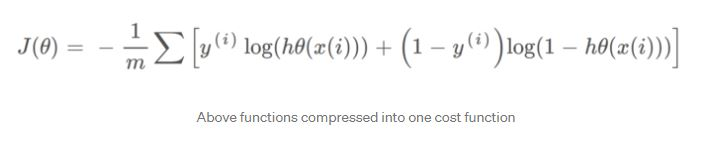

In [164]:
# Cost function and Gradient
def gradientDescent(x, y, theta, alpha, num_iters):
    """
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    """
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    for i in range(0, num_iters):
        z = np.dot(x, theta)#Dot product of two arrays
        h = sigmoid(z)
        # calculate the cost function
        cost = -1. / m * (np.dot(y.transpose(), np.log(h)) + np.dot((1 - y).transpose(), np.log(1 - h)))
        # update the weights theta
        theta = theta - (alpha / m) * np.dot(x.transpose(), (h - y))

    cost = float(cost)
    return cost, theta


In [165]:
#  Extracting the features

def extract_features(tweet, freqs):
    """
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    """

    word_l = process_tweet(tweet)
    x = np.zeros((1, 3))

    # bias term is set to 1
    x[0, 0] = 1

    for word in word_l:
        # increment the word count for the positive label 1
        x[0, 1] += freqs.get((word, 1.0), 0)
        
        # increment the word count for the negative label 0
        x[0, 2] += freqs.get((word, 0.0), 0)

    assert (x.shape == (1, 3))
    return x

In [166]:
# test on training data

tmp1 = extract_features(train_x[22], freqs)
print(tmp1)

[[1.000e+00 3.006e+03 1.240e+02]]


In [ ]:
# Try to understand what all these three numbers mean. 
# Usually we get a dataset with a lot of features/columns, here we just have text data.
# Those three numbers are the feature set that we have build using build_fr() and extract_features() function.
# build_fr() builds a dictionary having words as keys and the number of times they have occurred in corpus as values.
# Extract feature takes in sum of these values for positive and negative words, i.e. tmp1[1] and tmp[2]


In [ ]:
# How these features will be used to predict in Logistic Regression

# First a hypothesis is build which for our case will be h(x) = b1 + b2*x1 + b3*x2
# here b1 = 1, b2 and b3 are determined by cost and gradient function, x1 and x2 are the positive and negative words feature set.

In [167]:
# Training Your Model

# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
# these values are predefined (Andrew NG)
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

In [168]:
def predict_tweet(tweet, freqs, theta):
    """
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    """
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(np.dot(x, theta))

    return y_pred


In [169]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)

    accuracy = (y_hat == np.squeeze(test_y)).sum() / len(test_x)

    return accuracy

In [170]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [171]:
# Predict with your own tweet

def pre(sentence):
    yhat = predict_tweet(sentence, freqs, theta)
    if yhat > 0.5:
        return 'Positive sentiment'
    elif yhat == 0:
        return 'Neutral sentiment'
    else:
        return 'Negative sentiment'

In [172]:
my_tweet = 'I am a little sick'

res = pre(my_tweet)
print(res)

Negative sentiment


In [173]:
my_tweet2 = ' Yujuu I am on vacations! '

res1 = pre(my_tweet2)
print(res1)

Positive sentiment
